# Problem 1

a) The degree of each node is as follows:

- Node 1: 2
- Node 2: 3
- Node 3: 5
- Node 4: 3
- Node 5: 1
- Node 6: 2
- Node 7: 2

The relative frequency of degrees (which is precisely the degree disribution) is, thus:

- Degree 1: $P(1) = 1 / 7$
- Degree 2: $P(2) = 3 / 7$
- Degree 3: $P(3) = 2 / 7$
- Degree 4: $P(4) = 0 / 7$
- Degree 5: $P(5) = 1 / 7$

b) The local clustering coefficient of a node $i$ is given by

$$
c_i = \frac{e_i}{k_i \cdot (k_i - 1)\ /\ 2}
$$

Where $e_i$ is the number of edges in the subgraph $G_i$ of neighbors of node $i$, $k_i$ is the degree of node $i$.

The local clustering coefficient of each node is therefore:

- Node 1: $1 / 1$
- Node 2: $2 / 3$
- Node 3: $2 / 10$
- Node 4: $2 / 3$
- Node 5: $0 / 0$
- Node 6: $1 / 1$
- Node 7: $1 / 1$

c) The difficulty here is to count the number of triads...

- Triads centered on node 1: 1
- Triads centered on node 2: 3
- Triads centered on node 3: 10
- Triads centered on node 4: 3
- Triads centered on node 5: 0
- Triads centered on node 6: 1
- Triads centered on node 7: 1
- Total: 19

The transitivity of the graph is then:

$$
\frac{3 \cdot no.\ of\ triangles}{no.\ of\ triads} = \frac{3 \cdot 3}{19} = \frac{9}{19}
$$

d) The distance matrix is:

$$
\begin{bmatrix}
    0 & 1 & 2 & 1 & 3 & 3 & 3 \\
    1 & 0 & 1 & 1 & 2 & 2 & 2 \\
    2 & 1 & 0 & 1 & 1 & 1 & 1 \\
    1 & 1 & 1 & 0 & 2 & 2 & 2 \\
    3 & 2 & 1 & 2 & 0 & 2 & 2 \\
    3 & 2 & 1 & 2 & 2 & 0 & 1 \\
    3 & 2 & 1 & 2 & 2 & 1 & 0 \\
\end{bmatrix}
$$

e) The entropy is:

$$
E = -[ 1/7 \cdot log_2(1/7) + 3/7 \cdot log_2(3/7) + 2/7 \cdot log_2(2/7) + 1/7 \cdot log_2(1/7)] = 1.842371
$$

Where I have arbitrarily chosen the logarithm base as being 2 (I'm a computer scientist, after all).

f) The second moment is

$$
    E(X^2) = \sum_{x \in X} x^2 \cdot p(x) = 8
$$

We now answer the same questions by means of python programming.

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

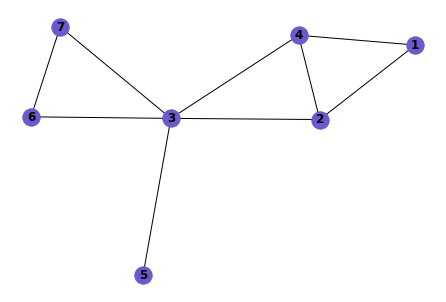

In [48]:
G = nx.Graph()
G.add_edges_from([
        [1, 2], [1, 4],
        [2, 1], [2, 4], [2, 3],
        [3, 4], [3, 5], [3, 6], [3, 7],
        [6, 7]
    ])

plt.figure()
nx.draw(G, with_labels=True, font_weight="bold", node_color="slateblue")
plt.show()

In [62]:
nodes = [ i for i in G.nodes() ]
degs = [ G.degree[n] for n in nodes ] 

print("Answer of a)")
for deg in np.unique(degs):
    print("Degree {}: P({}) = {}/{}".format(
        deg,
        deg,
        sum(degs == deg),
        len(nodes)
    ))

Answer of a)
Degree 1: P(1) = 1/7
Degree 2: P(2) = 3/7
Degree 3: P(3) = 2/7
Degree 5: P(5) = 1/7


In [64]:
print("b) Local clustering")
for n in sorted(G.nodes()):
    print("Node {}: {}".format(n, nx.clustering(G, n)))

b) Local clustering
Node 1: 1.0
Node 2: 0.6666666666666666
Node 3: 0.2
Node 4: 0.6666666666666666
Node 5: 0
Node 6: 1.0
Node 7: 1.0


In [67]:
print("c) Transitivity: {}".format(nx.transitivity(G)))

c) Transitivity: 0.47368421052631576


In [77]:
print("d) Distance matrix:")

nodes = sorted(G.nodes())
paths = nx.shortest_path(G)

for i in nodes:
    for j in nodes:
        print(len(paths[i][j]) - 1, end=" ")
    print()

d) Distance matrix:
0 1 2 1 3 3 3 
1 0 1 1 2 2 2 
2 1 0 1 1 1 1 
1 1 1 0 2 2 2 
3 2 1 2 0 2 2 
3 2 1 2 2 0 1 
3 2 1 2 2 1 0 


In [118]:
nodes = [ i for i in G.nodes() ]
degs = [ G.degree[n] for n in nodes ] 

freqs = dict()
for deg in np.unique(degs):
    freqs[deg] = sum(degs == deg)

def prob(x):
    if x not in freqs:
        return 0
    else:
        return freqs[x] / sum(freqs.values())

probs = [ prob(i) for i in range(0, 100) ]
entropy = -sum([ p*np.log2(p) for p in probs if p != 0])

print("e) Entropy: {}".format(entropy))
print("f) Second moment: {}".format(sum([ i**2 * probs[i] for i in range(0, 100) ])))

e) Entropy: 1.8423709931771084
f) Second moment: 7.999999999999999


### All results match!

# Problem 2